## 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Data Understaning

In [2]:
# Reading the data
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the dataset
bikes.shape

(730, 16)

In [4]:
# Column names of data set
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# column details of the data set
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Describe the dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Investigating data and data type categorical columns - season
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# Investigating data and data type categorical columns - weathersit
bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [9]:
# Investigating data and data type categorical columns - mnth
bikes.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [10]:
# Investigating data and data type categorical columns - weekday
bikes.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

## 3. Data Preparation for EDA

In [11]:
# Dropping instant column
bikes.drop('instant',axis=1,inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Modifying the categorical variable in mnth
bikes["mnth"] = bikes["mnth"].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bikes["mnth"].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [13]:
# Modifying the categorical variable in yr
bikes["yr"] = bikes["yr"].map({0:'2018', 1:'2019'})
bikes['yr'] = bikes['yr'].astype('int64')
bikes["yr"].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [14]:
# Modifying the categorical variable in season 
bikes["season"] = bikes["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Modifying the categorical variable in weekday 
bikes["weekday"] = bikes["weekday"].map({1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 7:'sunday'})
bikes["weekday"].value_counts()

monday       105
tuesday      105
wednesday    104
thursday     104
friday       104
saturday     104
Name: weekday, dtype: int64

In [16]:
# Modifying the categorical variable in weathersit 
bikes["weathersit"] = bikes["weathersit"].map({1:'Clear', 2:'Mist/Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
bikes["weathersit"].value_counts()

Clear              463
Mist/Cloudy        246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [17]:
# Modifying the categorical variable data type in dteday
bikes['dteday'] = bikes['dteday'].astype('datetime64')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     626 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

## 4. Data Visualization 

### 4.1 Data Visualization - Numerical variables (Distribution)

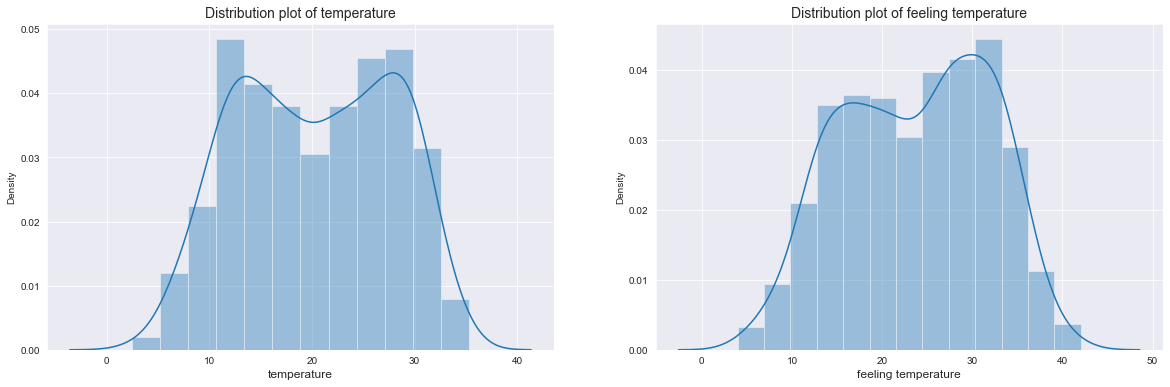

In [18]:
# Visualizing distribution of numerical variables - temperature & feeling temperature
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax1 = sns.distplot(bikes["temp"], ax=ax1)
ax1.set_xlabel("temperature", fontsize=12)
ax1.set_title("Distribution plot of temperature", fontsize=14)
ax2 = sns.distplot(bikes["atemp"], ax=ax2)
ax2.set_xlabel("feeling temperature", fontsize=12)
ax2.set_title("Distribution plot of feeling temperature", fontsize=14)
plt.show()

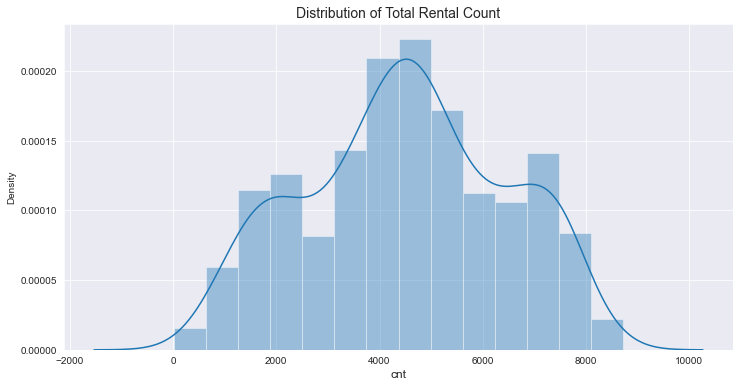

In [19]:
# Visualizing distribution of target numerical variables - count of rentals
plt.figure(figsize=(12,6))
sns.distplot(bikes["cnt"])
plt.xlabel("cnt", fontsize=12)
plt.title("Distribution of Total Rental Count", fontsize=14)
plt.show()

### 4.2 Data Visualization - Categorical variables

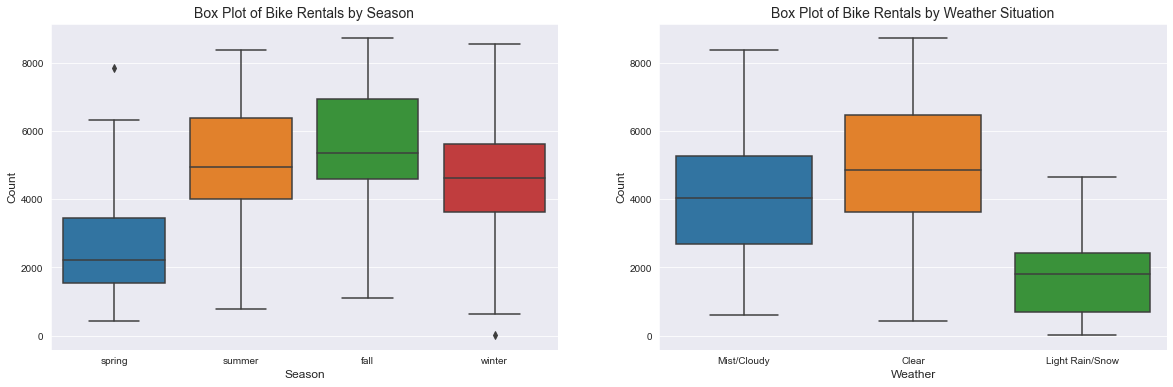

In [20]:
# Visualizing outliers for categorical variables - season & weather situation
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax1 = sns.boxplot(x='season', y = 'cnt', data = bikes, ax=ax1)
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_title("Box Plot of Bike Rentals by Season", fontsize=14)
ax2 = sns.boxplot(x='weathersit', y = 'cnt', data = bikes, ax=ax2)
ax2.set_xlabel("Weather", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title("Box Plot of Bike Rentals by Weather Situation", fontsize=14)
plt.show()

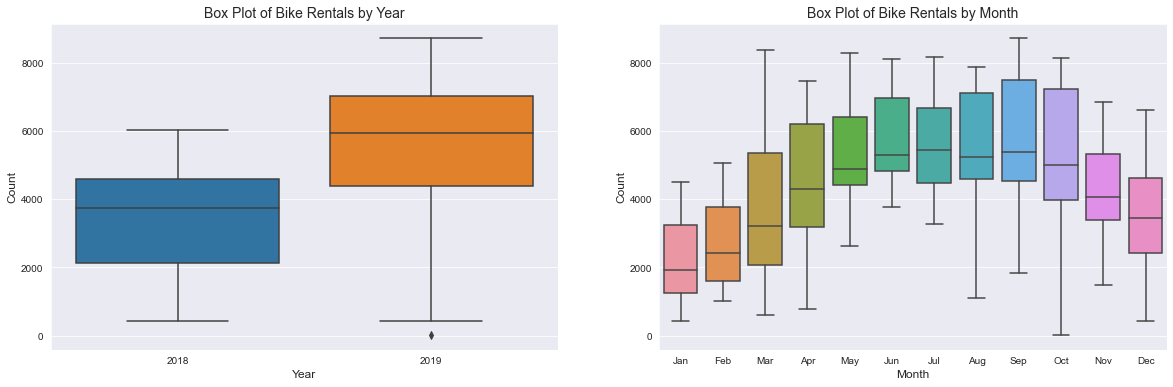

In [21]:
# Visualizing outliers for categorical variables - year & month
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax1 = sns.boxplot(x='yr', y = 'cnt', data = bikes, ax=ax1)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_title("Box Plot of Bike Rentals by Year", fontsize=14)
ax2 = sns.boxplot(x='mnth', y = 'cnt', data = bikes, ax=ax2)
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title("Box Plot of Bike Rentals by Month", fontsize=14)
plt.show()

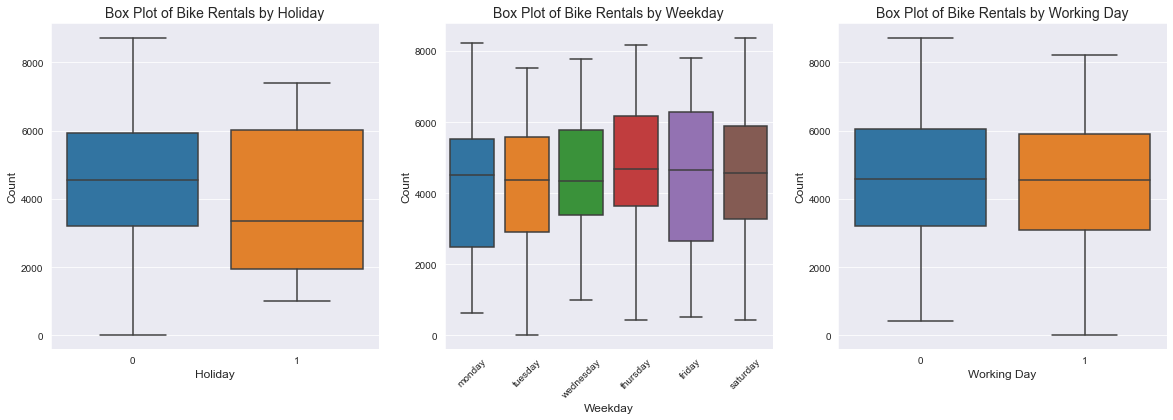

In [22]:
# Visualizing outliers for categorical variables - holiday, weekday & workingday
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax1 = sns.boxplot(x='holiday', y = 'cnt', data = bikes, ax=ax1)
ax1.set_xlabel("Holiday", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_title("Box Plot of Bike Rentals by Holiday", fontsize=14)
ax2 = sns.boxplot(x='weekday', y = 'cnt', data = bikes, ax=ax2)
ax2.set_xlabel("Weekday", fontsize=12)
ax2.tick_params(axis='x',labelrotation=45)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title("Box Plot of Bike Rentals by Weekday", fontsize=14)
ax3 = sns.boxplot(x='workingday', y = 'cnt', data = bikes, ax=ax3)
ax3.set_xlabel("Working Day", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.set_title("Box Plot of Bike Rentals by Working Day", fontsize=14)
plt.show()

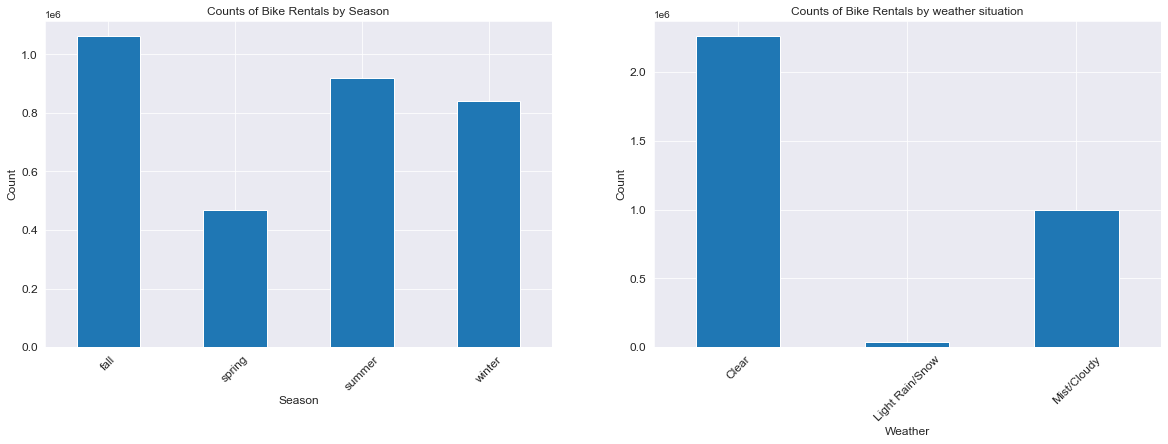

In [23]:
# Visualizing barplot for categorical variables - season & weather situation
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax1 = bikes[['season','cnt']].groupby(['season']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Season", fontsize=12, ax=ax1)
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis='x',labelrotation=45)
ax2 = bikes[['weathersit','cnt']].groupby(['weathersit']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by weather situation", fontsize=12, ax=ax2)
ax2.set_xlabel("Weather", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis='x',labelrotation=45)
plt.show()

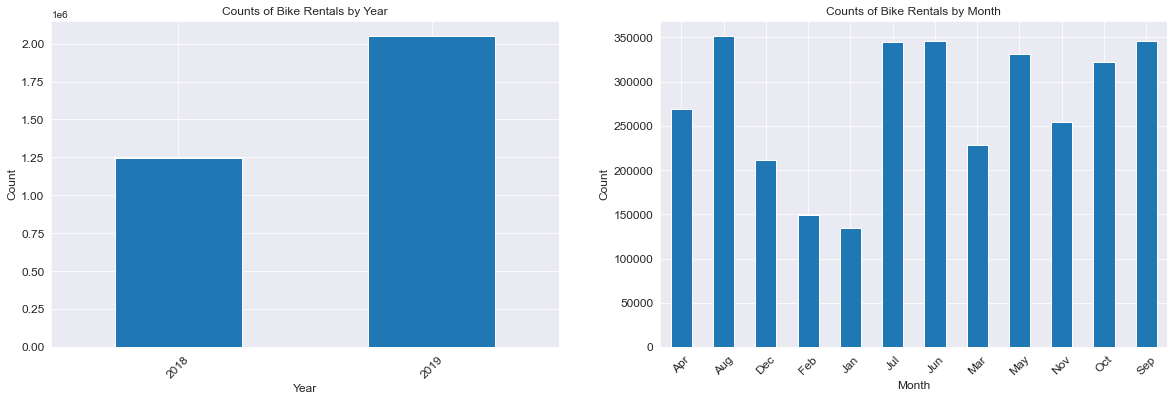

In [24]:
# Visualizing barplot for categorical variables - year & month
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax1 = bikes[['yr','cnt']].groupby(['yr']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Year", fontsize=12, ax=ax1)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis='x',labelrotation=45)
ax2 = bikes[['mnth','cnt']].groupby(['mnth']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Month", fontsize=12, ax=ax2)
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis='x',labelrotation=45)
plt.show()

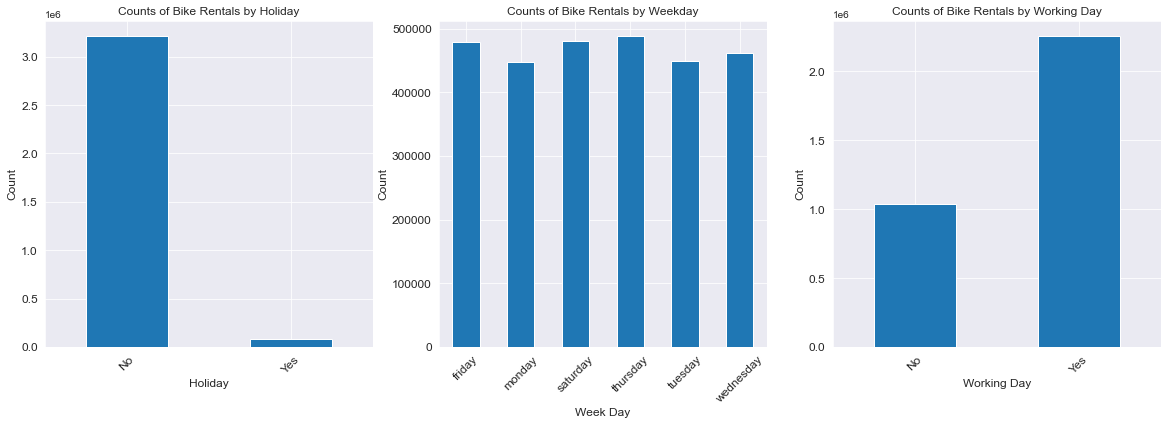

In [25]:
# Visualizing barplot for categorical variables - holiday, weekday & workingday
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax1 = bikes[['holiday','cnt']].groupby(['holiday']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Holiday", fontsize=12, ax=ax1)
ax1.set_xlabel("Holiday", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis='x',labelrotation=45)
ax1.set_xticklabels(['No','Yes'])
ax2 = bikes[['weekday','cnt']].groupby(['weekday']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Weekday", fontsize=12, ax=ax2)
ax2.set_xlabel("Week Day", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis='x',labelrotation=45)
ax3 = bikes[['workingday','cnt']].groupby(['workingday']).sum().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Working Day", fontsize=12, ax=ax3)
ax3.set_xlabel("Working Day", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.tick_params(axis='x',labelrotation=45)
ax3.set_xticklabels(['No','Yes'])
plt.show()

__Conclusion__ :
- In different seasons `fall` is the best season for bike rentals, followed by `summer` and `winter`. `spring` has the lowest count in rentals.
- `Clear` sky consitutes better bike rentals, `mist/cloudy` days have renatls less than half that. `Rainy` days have very less amout of rental count.
- `2019` the rental count has grown significantly from `2018`.
- Most rentals are seen during `working days`.

### 4.3 Data Visualization - Numeric variables (Correlation)

In [26]:
# List numeric variables
num_varlist = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
bikes[num_varlist].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


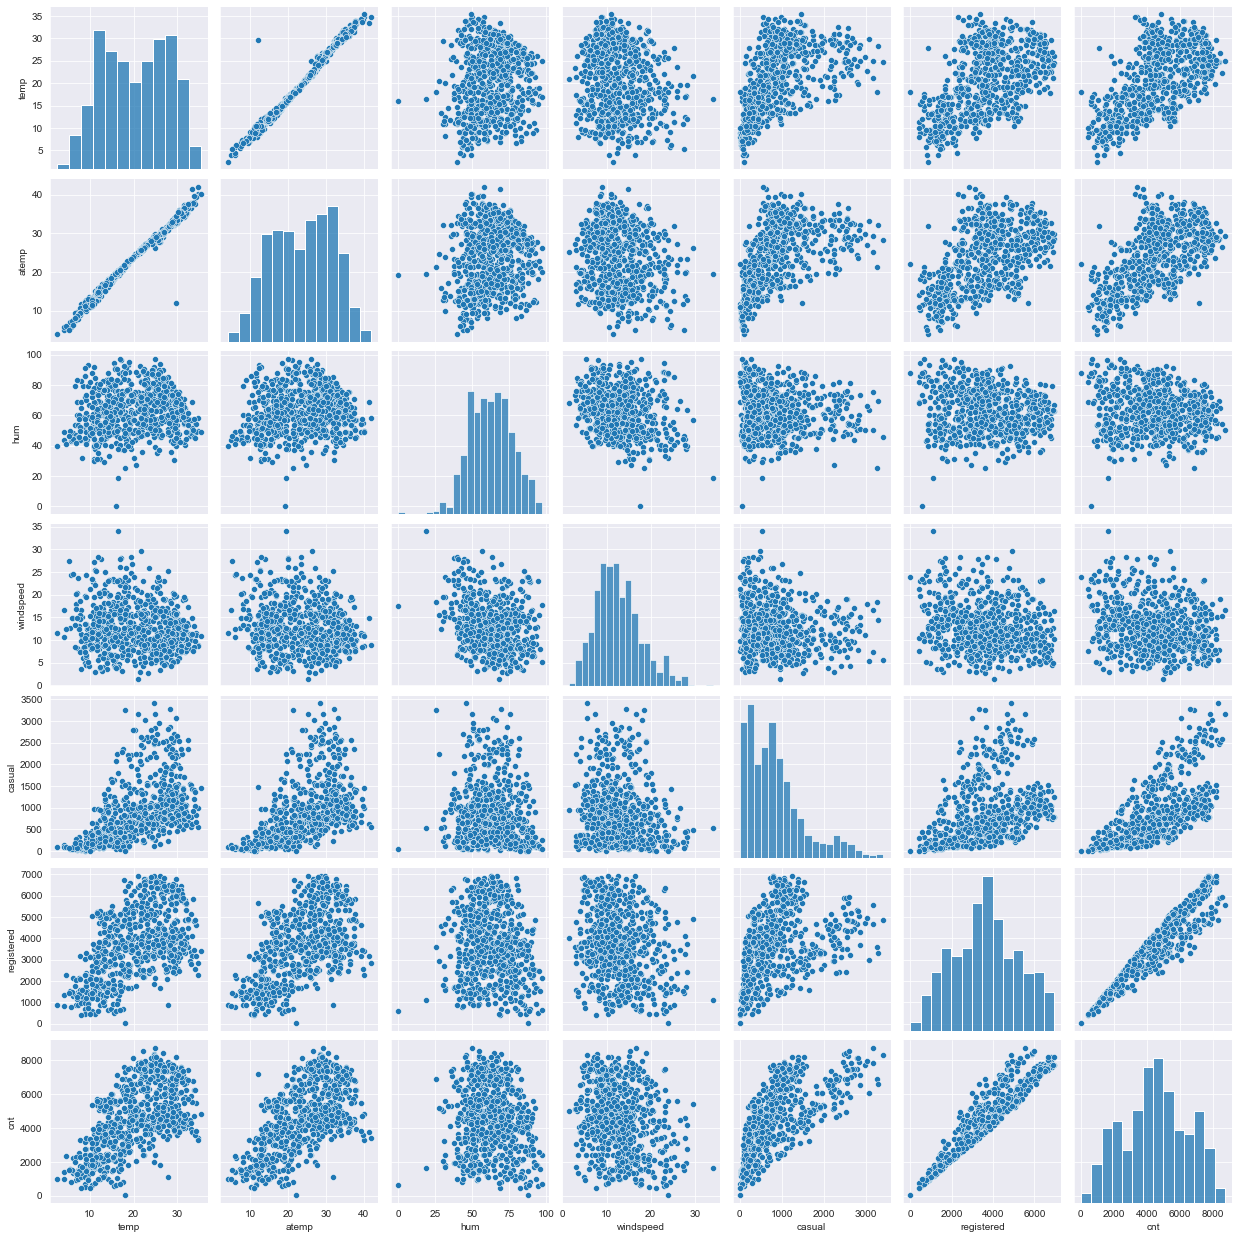

In [27]:
# Visulizing pairplot of numeric variables
sns.pairplot(bikes[num_varlist])
plt.show()

In [28]:
# Correlation matrix of numeric variables
corr_val = bikes[num_varlist].corr()
corr_val

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


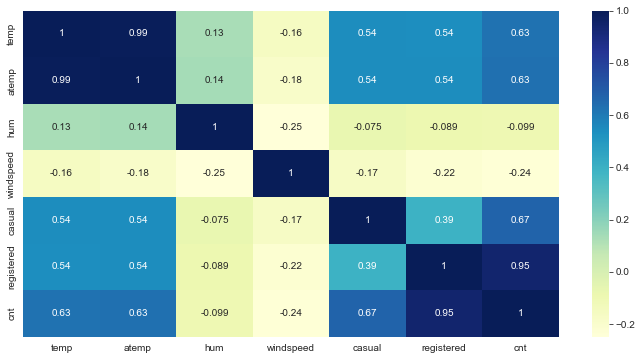

In [29]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(corr_val, annot=True, cmap="YlGnBu")
plt.show()

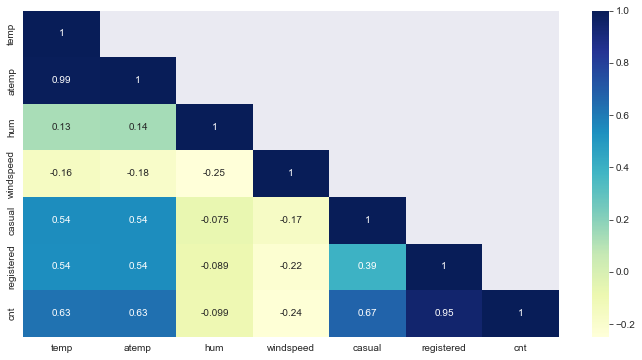

In [30]:
# Heatmap of correlation matrix
mask = np.array(corr_val)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.heatmap(corr_val,annot=True, mask=mask, cmap="YlGnBu")
plt.show()

__Conclusion__:
- `temp` and `atemp` is highly correlated and both have similar correlation with `cnt`, so this two columns are indications of multicolinearity
- `casual` and `registered` these two independent variables are highly correlated with the target variable `cnt`
- `windspeed` has a high negative correlation with target variable `cnt`

## 5. Data Preparation for Model Building

In [31]:
# Overviewing of the data
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,Jan,0,monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,Jan,0,tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     626 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

### 5.1 Dropping unnecessary columns

In [33]:
# Dropping unnecessary columns for model building
bikes.drop(["dteday", "casual", "registered"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Removing atemp variable as it is highly correlated with temp
bikes.drop(["atemp"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,monday,1,Mist/Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,tuesday,1,Mist/Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,friday,1,Clear,9.305237,43.6957,12.522300,1600


### 5.2 Creating dummy variables

In [35]:
# Creating dummy variables for categorical columns
categorical_cols = ["season", "mnth", "weekday", "weathersit"]
dummy_df = pd.get_dummies(bikes[categorical_cols], drop_first=True)
dummy_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Concating the dummy data with original data set
bikes = pd.concat([bikes, dummy_df], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,spring,2018,Jan,0,monday,1,Mist/Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,tuesday,1,Mist/Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,Jan,0,wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,Jan,0,friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Dropping original columns 
bikes.drop(categorical_cols, axis=1, inplace=True)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  mnth_Aug                    730 non-null    uint8  
 11  mnth_Dec                    730 non-null    uint8  
 12  mnth_Feb                    730 non-null    uint8  
 13  mnth_Jan                    730 non

In [38]:
# Splitting X and y for model, Using copy command
X = bikes.drop("cnt", axis=1).copy()
y = bikes.cnt.copy()

In [39]:
# Shape of X
X.shape

(730, 27)

In [40]:
# Shape of y
y.shape

(730,)

### 5.3 Train-Test Split for model

Here, we will split the data into 2 parts
1. Train Data (On which model will be build and is almost 70% of total data)
2. Test Data (On which build model will be tested and is almost 30% of total data)


In [41]:
# train-test split of the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
# Shape of X_train
X_train.shape

(510, 27)

In [43]:
# Shape of X_test
X_test.shape

(219, 27)

In [44]:
# Shape of y_train
y_train.shape

(510,)

In [45]:
# Shape of y_test
y_test.shape

(219,)

### 5.4 Data Transformation (Normalising)

Following Columns are Numerical which needs to be Normalised:
- Date
- Temperature
- Humidity
- Windspeed

In [46]:
numerical_variables = ['temp', 'hum', 'windspeed',]

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
653,2019,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
576,2019,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,2019,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,2019,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Info of X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   season_spring               510 non-null    uint8  
 7   season_summer               510 non-null    uint8  
 8   season_winter               510 non-null    uint8  
 9   mnth_Aug                    510 non-null    uint8  
 10  mnth_Dec                    510 non-null    uint8  
 11  mnth_Feb                    510 non-null    uint8  
 12  mnth_Jan                    510 non-null    uint8  
 13  mnth_Jul                    510 no

## 6. Model building

### 6.1 Linear Regression using Stats Models API

In [50]:
# Creating user define fumction for Building Model
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [51]:
# Creating user define fumction for Checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### 6.2 Model 1 with all the parameters / features

In [52]:
# Intial Model including all features
X_train_1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.41e-180
Time:                        21:35:06   Log-Likelihood:                -4102.2
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     482   BIC:                             8379.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
checkVIF(X_train_1)

,Features,VIF
0,const,17217422.71
7,season_spring,10.79
9,season_winter,9.49
8,season_summer,8.29
4,temp,7.14
18,mnth_Nov,6.79
19,mnth_Oct,6.59
10,mnth_Aug,6.43
13,mnth_Jan,5.90
14,mnth_Jul,5.68


- Dropping Features one by one where ___p-value > 0.05___ and ___VIF > 5___

In [54]:
# Dropping column season_spring and verifying the model with p-value and VIF
X = X_train.drop('season_spring', axis=1)
X_train_2 = build_model(X, y_train)
checkVIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.44e-180
Time:                        21:35:06   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     483   BIC:                             8375.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17208357.23
4,temp,7.04
17,mnth_Nov,6.79
18,mnth_Oct,6.59
8,season_winter,6.08
10,mnth_Dec,5.63
12,mnth_Jan,5.22
9,mnth_Aug,5.12
7,season_summer,4.74
13,mnth_Jul,4.65


### 6.3 Model 2 

- Dropping 'mnth_Nov' column beacuse of high p-value

In [55]:
# Dropping column season_spring and verifying the model with p-value and VIF
X = X_train.drop('season_spring', axis=1)
X_train_2 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.44e-180
Time:                        21:35:07   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     483   BIC:                             8375.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
checkVIF(X_train_2)

,Features,VIF
0,const,17208357.23
4,temp,7.04
17,mnth_Nov,6.79
18,mnth_Oct,6.59
8,season_winter,6.08
10,mnth_Dec,5.63
12,mnth_Jan,5.22
9,mnth_Aug,5.12
7,season_summer,4.74
13,mnth_Jul,4.65


### 6.4 Model 3 

- Dropping 'mnth_Nov' column beacuse of high VIF

In [57]:
# Dropping column mnth_Nov and verifying the model with p-value and VIF
X = X.drop('mnth_Nov', axis=1)
X_train_3 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.54e-181
Time:                        21:35:07   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     484   BIC:                             8370.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
checkVIF(X_train_3)

,Features,VIF
0,const,17202145.04
4,temp,6.79
9,mnth_Aug,3.99
8,season_winter,3.84
13,mnth_Jul,3.82
12,mnth_Jan,3.31
7,season_summer,3.26
3,workingday,2.92
18,mnth_Sep,2.60
14,mnth_Jun,2.51


### 6.5 Model 4 

- Dropping 'mnth_Jul' column beacuse of high p-value

In [59]:
# Dropping column mnth_Jul and verifying the model with p-value and VIF
X = X.drop('mnth_Jul', axis=1)
X_train_4 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.35e-182
Time:                        21:35:07   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     485   BIC:                             8364.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
checkVIF(X_train_4)

,Features,VIF
0,const,17044527.63
4,temp,4.39
8,season_winter,3.32
12,mnth_Jan,3.22
3,workingday,2.91
7,season_summer,2.60
11,mnth_Feb,2.33
5,hum,2.00
14,mnth_Mar,1.83
15,mnth_May,1.76


### 6.6 Model 5 

- Dropping 'mnth_Mar' column beacuse of high p-value

In [61]:
# Dropping column mnth_Mar and verifying the model with p-value and VIF
X = X.drop('mnth_Mar', axis=1)
X_train_5 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.18e-183
Time:                        21:35:07   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     486   BIC:                             8358.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
checkVIF(X_train_5)

,Features,VIF
0,const,16997672.72
4,temp,3.43
3,workingday,2.91
8,season_winter,2.58
7,season_summer,2.46
12,mnth_Jan,2.25
5,hum,1.99
17,weekday_monday,1.74
20,weekday_tuesday,1.74
19,weekday_thursday,1.74


### 6.7 Model 6 

- Dropping 'mnth_Jun' column beacuse of high p-value

In [63]:
# Dropping column mnth_Jul and verifying the model with p-value and VIF
X = X.drop('mnth_Jun', axis=1)
X_train_6 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.59e-184
Time:                        21:35:07   Log-Likelihood:                -4104.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     487   BIC:                             8352.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
checkVIF(X_train_6)

,Features,VIF
0,const,16931439.43
3,workingday,2.90
4,temp,2.84
8,season_winter,2.57
7,season_summer,2.25
12,mnth_Jan,2.19
5,hum,1.97
19,weekday_tuesday,1.74
16,weekday_monday,1.74
18,weekday_thursday,1.73


### 6.8 Model 7 

- Dropping 'workingday' column beacuse of high p-value

In [65]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('workingday', axis=1)
X_train_7 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          3.08e-185
Time:                        21:35:07   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     488   BIC:                             8346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [66]:
checkVIF(X_train_7)

,Features,VIF
0,const,16911570.06
3,temp,2.84
7,season_winter,2.57
6,season_summer,2.25
11,mnth_Jan,2.19
4,hum,1.97
10,mnth_Feb,1.70
13,mnth_Oct,1.67
21,weathersit_Mist/Cloudy,1.58
9,mnth_Dec,1.51


 ### 6.9 Model 8 

- Dropping 'weekday_thursday' column beacuse of high p-value

In [67]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('weekday_thursday', axis=1)
X_train_8 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.61e-186
Time:                        21:35:08   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     489   BIC:                             8340.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
checkVIF(X_train_8)

,Features,VIF
0,const,16904966.85
3,temp,2.84
7,season_winter,2.57
6,season_summer,2.24
11,mnth_Jan,2.19
4,hum,1.97
10,mnth_Feb,1.69
13,mnth_Oct,1.67
20,weathersit_Mist/Cloudy,1.57
9,mnth_Dec,1.51


### 6.10 Model 9 

- Dropping 'weekday_saturday' column beacuse of high p-value

In [69]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('weekday_saturday', axis=1)
X_train_9 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.17e-187
Time:                        21:35:08   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [70]:
checkVIF(X_train_9)

,Features,VIF
0,const,16899093.39
3,temp,2.84
7,season_winter,2.57
6,season_summer,2.24
11,mnth_Jan,2.19
4,hum,1.96
10,mnth_Feb,1.69
13,mnth_Oct,1.67
19,weathersit_Mist/Cloudy,1.57
9,mnth_Dec,1.51


### 6.11 Model 10 

- Dropping 'mnth_Dec' column beacuse of high p-value

In [71]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('mnth_Dec', axis=1)
X_train_10 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.86e-188
Time:                        21:35:08   Log-Likelihood:                -4105.2
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [72]:
checkVIF(X_train_10)

,Features,VIF
0,const,16895890.74
3,temp,2.54
7,season_winter,2.54
6,season_summer,2.12
10,mnth_Jan,1.98
4,hum,1.93
9,mnth_Feb,1.57
18,weathersit_Mist/Cloudy,1.56
12,mnth_Oct,1.52
8,mnth_Aug,1.49


### 6.12 Model 11 

- Dropping 'weekday_wednesday' column beacuse of high p-value

In [73]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('weekday_wednesday', axis=1)
X_train_11 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.20e-189
Time:                        21:35:08   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     492   BIC:                             8324.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [74]:
checkVIF(X_train_11)

,Features,VIF
0,const,16888131.33
3,temp,2.54
7,season_winter,2.53
6,season_summer,2.12
10,mnth_Jan,1.97
4,hum,1.93
9,mnth_Feb,1.57
17,weathersit_Mist/Cloudy,1.56
12,mnth_Oct,1.51
8,mnth_Aug,1.49


### 6.13 Model 12

- Dropping 'mnth_May' column beacuse of high p-value

In [75]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('mnth_May', axis=1)
X_train_12 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          6.14e-190
Time:                        21:35:08   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     493   BIC:                             8319.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [76]:
checkVIF(X_train_12)

,Features,VIF
0,const,16859683.38
7,season_winter,2.53
3,temp,2.50
10,mnth_Jan,1.97
4,hum,1.89
6,season_summer,1.71
9,mnth_Feb,1.56
16,weathersit_Mist/Cloudy,1.56
11,mnth_Oct,1.51
8,mnth_Aug,1.48


### 6.14 Model 13 

- Dropping 'mnth_Feb' column beacuse of high p-value

In [77]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('mnth_Feb', axis=1)
X_train_13 = build_model(X, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.13e-190
Time:                        21:35:08   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     494   BIC:                             8315.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [78]:
checkVIF(X_train_13)

,Features,VIF
0,const,16830840.04
7,season_winter,2.04
3,temp,2.02
4,hum,1.89
9,mnth_Jan,1.56
15,weathersit_Mist/Cloudy,1.56
10,mnth_Oct,1.50
6,season_summer,1.48
8,mnth_Aug,1.46
11,mnth_Sep,1.25


__Inference__:
- All features `p-value` is less than `0.05` and `VIF` is also less than 5 almost equal to 2.
- `R-squared` and `Adj. R-squared` is `84.8%` and `84.3%` which is also very good indicator for a model

## 7. Residual Analysis of the model

In [79]:
# Predicting y values based on the model for training set
lr_model = sm.OLS(y_train, X_train_13).fit()
y_train_pred = lr_model.predict(X_train_13)
y_train_pred.head()

653    6654.127464
576    6383.519338
426    4396.297660
728    3333.906682
482    5346.516969
dtype: float64

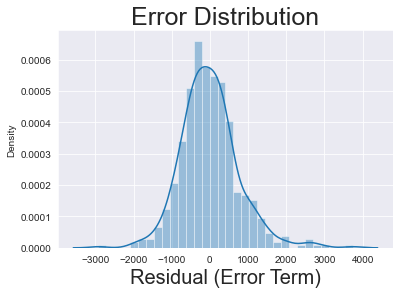

In [80]:
# Plotting the residuals for training set
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

- Note: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

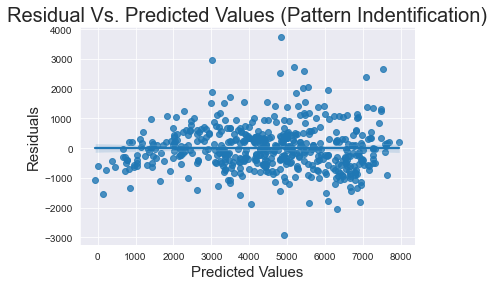

In [81]:
#Assumption of Error Terms Being Independent
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

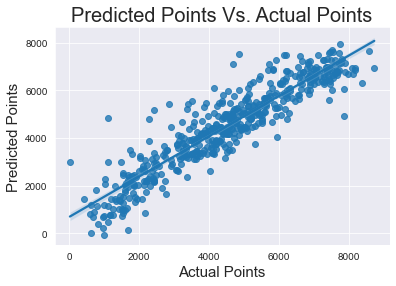

In [82]:
#Assumption of Homoscedasticity
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## 8. Evaluating Test Set

In [83]:
# Numerical values Transformation in test set
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,2018,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,2019,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,2018,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
221,2018,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,2018,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
# Adding constant in test set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,2018,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,2019,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,2018,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,1,0,0,1,0,0,0,0,1
221,1.0,2018,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,2018,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [85]:
# Dropping irrelevant columns in test as per train set model
X_test_sm = X_test_sm.drop(["season_spring","mnth_Nov","mnth_Mar","mnth_Jul","mnth_Jun","workingday","mnth_May",
                            "weekday_thursday","weekday_saturday","mnth_Dec","weekday_wednesday","mnth_Feb"], axis=1)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_Aug,mnth_Jan,mnth_Oct,mnth_Sep,weekday_monday,weekday_tuesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,2018,1,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,0,0,1
535,1.0,2019,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0,0,0
299,1.0,2018,0,0.511964,0.837699,0.334206,0,1,0,0,1,0,0,0,0,1
221,1.0,2018,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0,0,0
152,1.0,2018,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,0,0


In [86]:
# Predicting target variable in test set
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

184    3522.742764
535    7958.845611
299    3735.491464
221    5458.488835
152    5401.316386
dtype: float64

In [87]:
# Output of r2_score of Train
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8476016153073017

In [88]:
# Output of r2_score of Test
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8131599335389589

In [89]:
# Output of r2_score of Train and Test set
print("r2_score for Train Set : " , r2_score(y_true=y_train, y_pred=y_train_pred))
print("r2_score for Test Set  : " ,r2_score(y_true=y_test, y_pred=y_test_pred))

r2_score for Train Set :  0.8476016153073017
r2_score for Test Set  :  0.8131599335389589


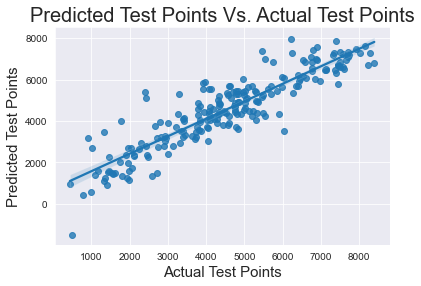

In [90]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()